<a href="https://colab.research.google.com/github/Data-Citadel/DeepLearning-Assignment1/blob/main/DL_Assignment_PS5_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vision Dataset-MNIST Fashion Dataset



## 1. Import Libraries/Dataset

In [2]:

# Import tensorflow and keras library
import tensorflow as tf

from tensorflow import keras

# Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
# Time library
import time

## 1.1 Load Dataset

In [3]:
# Load MNIST Fashion dataset from keras library
fashion_data = keras.datasets.fashion_mnist

# Destructuring the data into train and test
(X_train_full, y_train_full), (X_test, y_test) = fashion_data.load_data()

4423680/4422102 [==============================] - 0s 0us/step


## 1.2 GPU Availability

In [4]:
# Checking for GPU availability
print("Is GPU enabled in this machine? \n{}".format(tf.config.list_physical_devices('GPU')))

Is GPU enabled in this machine? 
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## 2. Data Visualization

### 2.1 Shape of Train and Test data

In [5]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [6]:
print("Shape of Training Data : {}".format(X_train_full.shape))
print("Shape of Test Data : {}".format(X_test.shape))

Shape of Training Data : (60000, 28, 28)
Shape of Test Data : (10000, 28, 28)


In [7]:
# Number of classes
np.unique(y_train_full)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

### 2.2 Plot image data

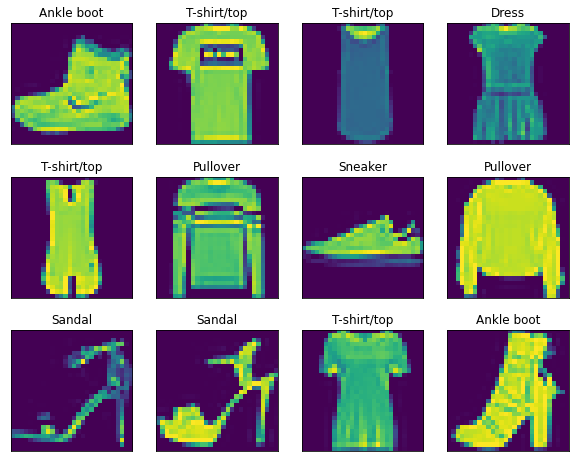

In [8]:
plt.figure(figsize=(10,8))

for i in range(12):
  plt.subplot(3,4, i+1)
  plt.imshow(X_train_full[i])
  index = y_train_full[i]
  plt.title(class_names[index])
  plt.xticks([])
  plt.yticks([])

plt.show()

## 3. Data Pre-Processing

### 3.1 Process the image data



In [9]:
# Convert target labels to one-hot encoding matrix
y_train_full = keras.utils.to_categorical(y_train_full)
y_test = keras.utils.to_categorical(y_test)


### 3.2 Split the data into Train, Holdout and Dev(test)

In [10]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

In [11]:
print("Shape of Training set {}".format(X_train.shape))
print("Shape of Holdout set {}".format(X_valid.shape))

Shape of Training set (48000, 28, 28)
Shape of Holdout set (12000, 28, 28)


## 4. Model Building

A function to construct a network with 3-Dense layers with appropriate input layer will be defined. 

In [12]:
def build_model():
  # L2 regularizer rate
  l2_rate = 0.003 # 0.001 
  dropout_rate = 0.3 # Dropout rate

  model = keras.models.Sequential()

  model.add(keras.layers.Input(shape=(28, 28, 1)))
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(256, activation='relu',
                               kernel_regularizer=keras.regularizers.L2(l2_rate)))
  model.add(keras.layers.Dropout(dropout_rate))
  model.add(keras.layers.Dense(128, activation='relu',
                            kernel_regularizer=keras.regularizers.L2(l2_rate)))
  model.add(keras.layers.Dropout(dropout_rate))
  model.add(keras.layers.Dense(64, activation='relu',
                            kernel_regularizer=keras.regularizers.L2(l2_rate)))
  model.add(keras.layers.Dropout(dropout_rate))
  model.add(keras.layers.Dense(10, activation='softmax'))

  return model


In [13]:
# Building a model
ffnn_model = build_model()

In [14]:
ffnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0

## 5. Compile the model

The model is compiled with the following parameters
1. Loss Function - Categorical Cross Entropy
2. Optimizer - ADAM with learning rate 0.0005
3. Metrics - Accuracy

In [15]:
ffnn_model.compile(loss=keras.losses.CategoricalCrossentropy(),
                  optimizer=keras.optimizers.Adam(learning_rate=0.00023),
                  metrics=['accuracy'])

## 6. Train Model

The model will be trained by fitting the training and validation data. 

In [16]:
epochs_run = 30
batchsize = 128

# start time
start_time = time.perf_counter()

# Fitting the data
history = ffnn_model.fit(X_train, 
                         y_train, 
                         epochs=epochs_run, 
                         batch_size=batchsize,
                         validation_data=(X_valid, y_valid), 
                         verbose=1)
# Total time taken for training the given dataset
elapsed = time.perf_counter() - start_time


Epoch 1/30
375/375 [==============================] - 1s 3ms/step - loss: 15.7065 - accuracy: 0.3679 - val_loss: 3.2224 - val_accuracy: 0.6068
Epoch 2/30
375/375 [==============================] - 1s 3ms/step - loss: 3.8595 - accuracy: 0.4545 - val_loss: 3.0047 - val_accuracy: 0.6240
Epoch 3/30
375/375 [==============================] - 1s 3ms/step - loss: 3.3652 - accuracy: 0.5228 - val_loss: 2.8509 - val_accuracy: 0.6467
Epoch 4/30
375/375 [==============================] - 1s 3ms/step - loss: 3.1320 - accuracy: 0.5609 - val_loss: 2.6956 - val_accuracy: 0.6643
Epoch 5/30
375/375 [==============================] - 1s 3ms/step - loss: 2.9435 - accuracy: 0.5887 - val_loss: 2.5729 - val_accuracy: 0.6738
Epoch 6/30
375/375 [==============================] - 1s 3ms/step - loss: 2.8011 - accuracy: 0.6054 - val_loss: 2.5207 - val_accuracy: 0.6816
Epoch 7/30
375/375 [==============================] - 1s 3ms/step - loss: 2.6634 - accuracy: 0.6248 - val_loss: 2.3773 - val_accuracy: 0.7039
Epoch

In [17]:
val_loss, val_acc = ffnn_model.evaluate(X_valid, y_valid)

print("\n\nValidation Loss {:.3f} and Validation Accuracy {:.2f}%".format(val_loss, val_acc))

375/375 [==============================] - 1s 2ms/step - loss: 0.5607 - accuracy: 0.8534


Validation Loss 0.561 and Validation Accuracy 0.85%


### 6.2 Plot loss and accuracy history graphs.

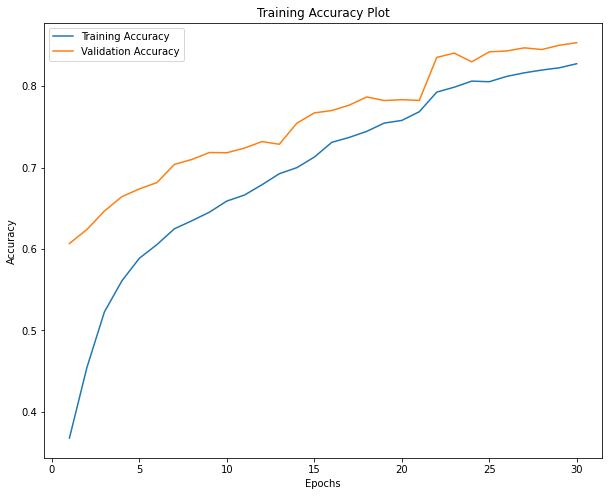

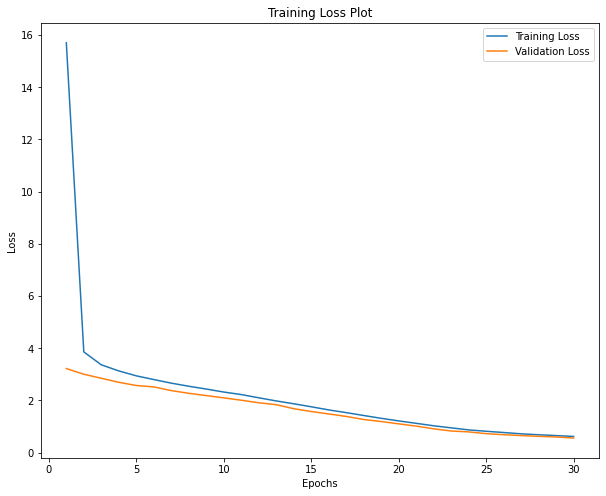

In [18]:
def evaluation_plot(history):
  """
  Method plots the model training result
  :param history: history of the model epochs run
  """
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  # Loss details
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(1, len(acc) + 1)

  plt.figure(figsize=(10,8))
  plt.plot(epochs, acc, label="Training Accuracy")
  plt.plot(epochs, val_acc, label="Validation Accuracy")
  plt.title("Training Accuracy Plot")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend()
  plt.show()

  # Loss and Validation loss plot
  plt.figure(figsize=(10,8))
  plt.plot(epochs, loss, label="Training Loss")
  plt.plot(epochs, val_loss, label="Validation Loss")
  plt.title("Training Loss Plot")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()

# Plot the epochs run
evaluation_plot(history)

### Total time taken for training

In [19]:
print("=="*40)
print("Total time taken for training {:.2f} seconds".format(elapsed))
print("=="*40)

Total time taken for training 34.48 seconds


## 7. Model Evaluation

### a. Score with Test data


In [20]:
y_preds = ffnn_model.predict(X_test)

In [21]:
# Converting Logits to Class code using argmax()
y_hat = tf.argmax(y_preds, 1)
rounded_test_labels = tf.argmax(y_test, 1)

In [22]:
y_hat.numpy()

array([9, 2, 1, ..., 8, 1, 5])

In [23]:
print("Confusion Matrix: \n {}".format(classification_report(rounded_test_labels, y_hat.numpy())))

Confusion Matrix: 
               precision    recall  f1-score   support

           0       0.78      0.84      0.81      1000
           1       0.97      0.97      0.97      1000
           2       0.72      0.72      0.72      1000
           3       0.87      0.85      0.86      1000
           4       0.68      0.79      0.73      1000
           5       0.96      0.95      0.96      1000
           6       0.67      0.52      0.59      1000
           7       0.93      0.95      0.94      1000
           8       0.97      0.95      0.96      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



# Hyperparameter Tuning

## 1. Model without regularization

In [24]:
def model_without_regularization():
  """
  Model without regularization 
  :return : Model with 3 hidden layers

  """
  model = keras.models.Sequential()

  model.add(keras.layers.Input(shape=(28, 28, 1)))
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(256, activation='relu'))
  model.add(keras.layers.Dense(128, activation='relu'))
  model.add(keras.layers.Dense(128, activation='relu'))
  model.add(keras.layers.Dense(64, activation='relu'))
  model.add(keras.layers.Dense(10, activation='softmax'))

  return model
  

In [25]:
# model object
model = model_without_regularization()

# Print model summary
print(model.summary())

# Compile the model
model.compile(loss="categorical_crossentropy",
                  optimizer="adam",
                  metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_6 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                650       
Total params: 259,274
Trainable params: 259,274
Non-trainable params: 0
________________________________________________

In [26]:
# Fitting the data
m_history = model.fit(X_train, 
                         y_train, 
                         epochs=20, 
                         batch_size=128,
                         validation_data=(X_valid, y_valid), 
                         verbose=1)

Epoch 1/20
375/375 [==============================] - 1s 3ms/step - loss: 1.7270 - accuracy: 0.7491 - val_loss: 0.5771 - val_accuracy: 0.8143
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.5293 - accuracy: 0.8224 - val_loss: 0.4894 - val_accuracy: 0.8320
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.4502 - accuracy: 0.8427 - val_loss: 0.4521 - val_accuracy: 0.8420
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3984 - accuracy: 0.8579 - val_loss: 0.4237 - val_accuracy: 0.8501
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3772 - accuracy: 0.8646 - val_loss: 0.4313 - val_accuracy: 0.8544
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3695 - accuracy: 0.8680 - val_loss: 0.4076 - val_accuracy: 0.8602
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3493 - accuracy: 0.8727 - val_loss: 0.4010 - val_accuracy: 0.8611
Epoch 

In [27]:
val_loss, val_acc = model.evaluate(X_valid, y_valid)

print("\n\nValidation Loss {:.3f} and Validation Accuracy {:.2f}%".format(val_loss, val_acc))

375/375 [==============================] - 1s 2ms/step - loss: 0.3734 - accuracy: 0.8741


Validation Loss 0.373 and Validation Accuracy 0.87%


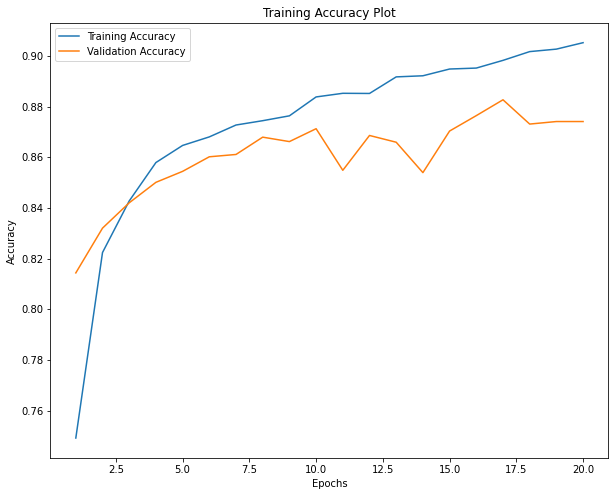

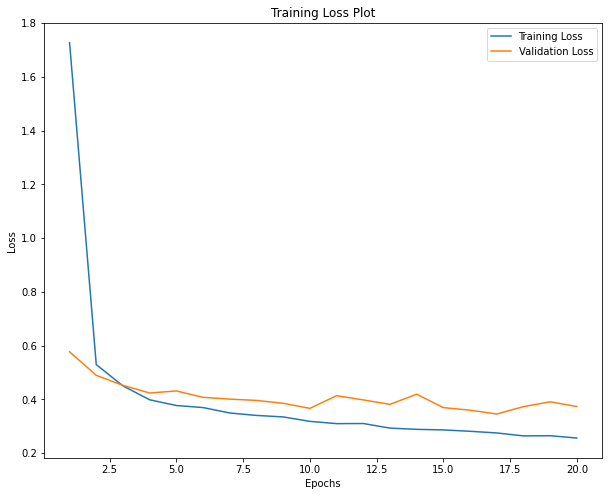

In [28]:
evaluation_plot(m_history)

## 2. Model with dropouts at different layers

In [1]:
def model_with_dropouts():
  """
  Model with only dropouts as to avoid overfitting
  :return : Constructed model

  """
  model = keras.models.Sequential()

  model.add(keras.layers.Input(shape=(28, 28, 1)))
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(256, activation='relu'))
  model.add(keras.layers.Dropout(0.2)) # Dropout at hidden layer 1
  model.add(keras.layers.Dense(128, activation='relu'))
  model.add(keras.layers.Dense(128, activation='relu'))
  model.add(keras.layers.Dropout(0.4)) # Dropout at hidden layer 3
  model.add(keras.layers.Dense(64, activation='relu'))
  model.add(keras.layers.Dropout(0.3))  # Dropout at hidden layer 4
  model.add(keras.layers.Dense(10, activation='softmax'))

  return model
  

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_16 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 64)               

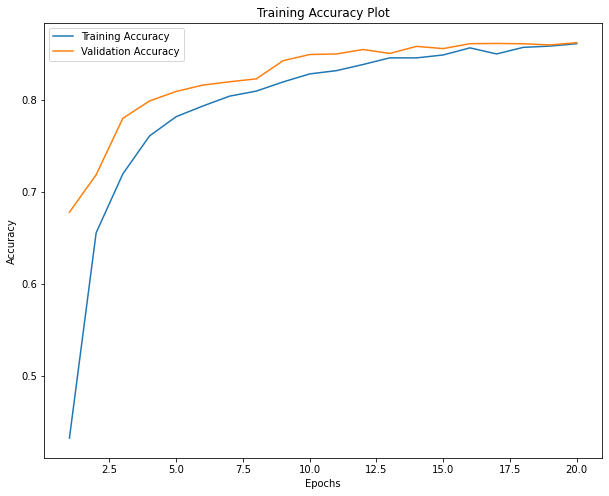

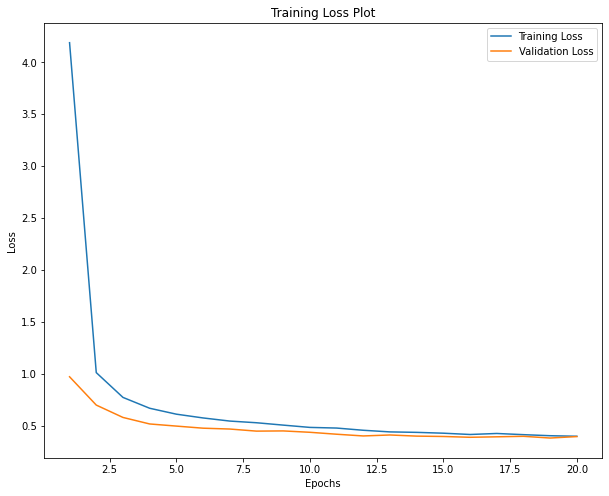

In [30]:
# model object
model = model_with_dropouts()

# Print model summary
print(model.summary())

# Compile the model
model.compile(loss="categorical_crossentropy",
                  optimizer="adam",
                  metrics=['accuracy'])

# Fitting the data
d_history = model.fit(X_train, 
                         y_train, 
                         epochs=20, 
                         batch_size=128,
                         validation_data=(X_valid, y_valid), 
                         verbose=1)

val_loss, val_acc = model.evaluate(X_valid, y_valid)

print("\n\nValidation Loss {:.3f} and Validation Accuracy {:.2f}%".format(val_loss, val_acc))

evaluation_plot(d_history)